## Dataset: [College Majors (recent-grads)](https://github.com/fivethirtyeight/data/tree/master/college-majors)
Source : [FiveThirtyEight datasets](https://data.fivethirtyeight.com/)


### Analise Burko & Marcos de la Torre

## Data Cleaning & EDA

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
import altair as alt 
alt.data_transformers.enable('json')

recent_grads = pd.read_csv('data/recent-grads.csv')

to_drop = ['Rank','Full_time','Part_time', 'Unemployment_rate','ShareWomen', 'P25th','P75th',
           'Sample_size']
recent_grads.drop(to_drop, axis=1, inplace=True)
recent_grads['Major_code'] = recent_grads['Major_code'].apply(str)

recent_grads.dropna(subset = ['Total'], inplace=True)
recent_grads.isna().sum()
recent_grads.astype({'Total': 'int64', 'Men': 'int64', 'Women': 'int64'}).dtypes

recent_grads = recent_grads.rename(columns={'Median': 'Median_income'})

# Convert major name to title case
recent_grads['Major'] = recent_grads['Major'].str.title()

# Get short names of majors
recent_grads['Total'] = recent_grads['Total'].apply(np.int64)
recent_grads['Men'] = recent_grads['Men'].apply(np.int64)
recent_grads['Women'] = recent_grads['Women'].apply(np.int64)
major_list = pd.read_csv('data/major_short_names.csv')
recent_grads = pd.merge(major_list, recent_grads, how='right')
recent_grads.rename(columns={'Major':'Major_long'}, inplace=True)
recent_grads.rename(columns={'Major_short':'Major'}, inplace=True)
recent_grads.rename(columns={'Full_time_year_round':'Employed Full-time'}, inplace=True)
recent_grads['Employed Part-time'] = recent_grads['Employed'] - recent_grads['Employed Full-time']

recent_grads.rename(columns={'Low_wage_jobs':'income: low-wage'}, inplace=True)
recent_grads['income: other'] = recent_grads['Employed'] - recent_grads['income: low-wage']

In [3]:
recent_grads.head()

,Major_category,Major_long,Major,Major_code,Total,Men,Women,Employed,Employed Full-time,Unemployed,Median_income,College_jobs,Non_college_jobs,income: low-wage,Employed Part-time,income: other
0,Engineering,Petroleum Engineering,Petroleum Eng.,2419,2339,2057,282,1976,1207,37,110000,1534,364,193,769,1783
1,Engineering,Mining And Mineral Engineering,Mining & Mineral Eng.,2416,756,679,77,640,388,85,75000,350,257,50,252,590
2,Engineering,Metallurgical Engineering,Metallurgical Eng.,2415,856,725,131,648,340,16,73000,456,176,0,308,648
3,Engineering,Naval Architecture And Marine Engineering,Naval Architecture & Marine Eng.,2417,1258,1123,135,758,692,40,70000,529,102,0,66,758
4,Engineering,Chemical Engineering,Chemical Eng.,2405,32260,21239,11021,25694,16697,1672,65000,18314,4440,972,8997,24722


In [4]:
recent_grads.describe()

,Total,Men,Women,Employed,Employed Full-time,Unemployed,Median_income,College_jobs,Non_college_jobs,income: low-wage,Employed Part-time,income: other
count,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,39370.081395,16723.406977,22646.674419,31355.80814,19798.843023,2428.412791,40076.744186,12387.401163,13354.325581,3878.633721,11556.965116,27477.174419
std,63483.491009,28122.433474,41057.330740,50777.42865,33229.227514,4121.730452,11461.388773,21344.967522,23841.326605,6960.467621,18390.345006,44400.913139
min,124.000000,119.000000,0.000000,0.00000,111.000000,0.000000,22000.000000,0.000000,0.000000,0.000000,-111.000000,0.000000
25%,4549.750000,2177.500000,1778.250000,3734.75000,2474.750000,299.500000,33000.000000,1744.750000,1594.000000,336.750000,1291.000000,3438.000000
50%,15104.000000,5434.000000,8386.500000,12031.50000,7436.500000,905.000000,36000.000000,4467.500000,4603.500000,1238.500000,4243.000000,10402.500000
75%,38909.750000,14631.000000,22553.750000,31701.25000,17674.750000,2397.000000,45000.000000,14595.750000,11791.750000,3496.000000,13508.000000,26900.250000
max,393735.000000,173809.000000,307087.000000,307933.00000,199897.000000,28169.000000,110000.000000,151643.000000,148395.000000,48207.000000,133495.000000,259726.000000


Text(0.5, 1.0, 'Median Income')

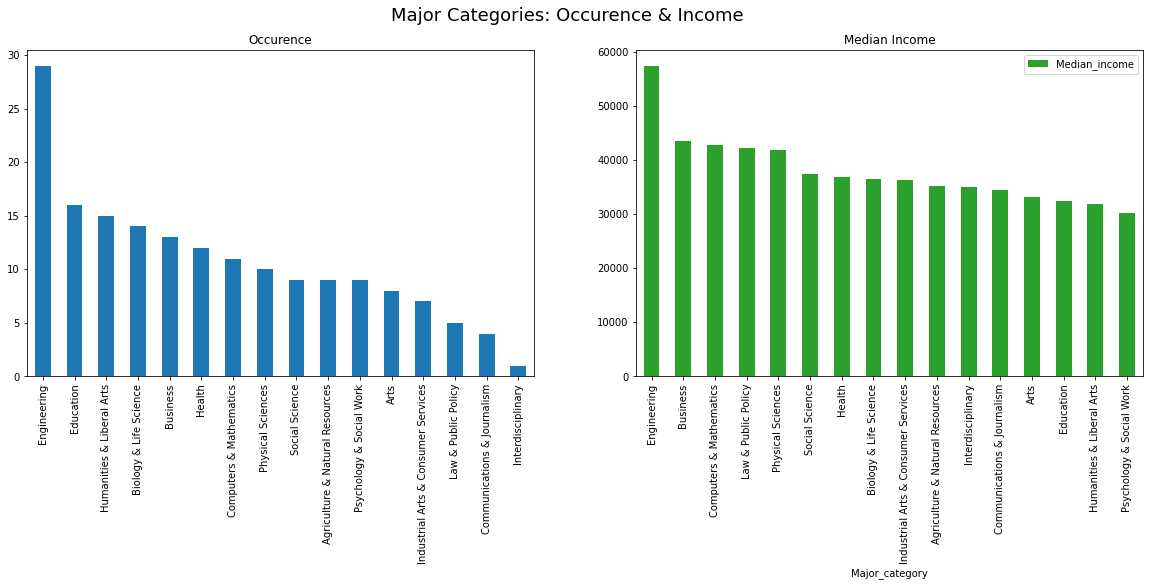

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
plt.suptitle('Major Categories: Occurence & Income', fontsize=18)

recent_grads['Major_category'].value_counts().plot(ax=ax1, kind='bar', color='tab:blue'
                                                  ).set_title('Occurence')
#.set_title('Major-Category Occurence', fontsize=16)

sal_groups = recent_grads[['Major_category','Median_income']].groupby('Major_category').mean()
sal_groups.sort_values(by=['Median_income'], ascending=False).plot(ax=ax2, kind='bar', color='tab:green'
                                                           ).set_title('Median Income')


Text(0.5, 1.0, 'income: low-wage')

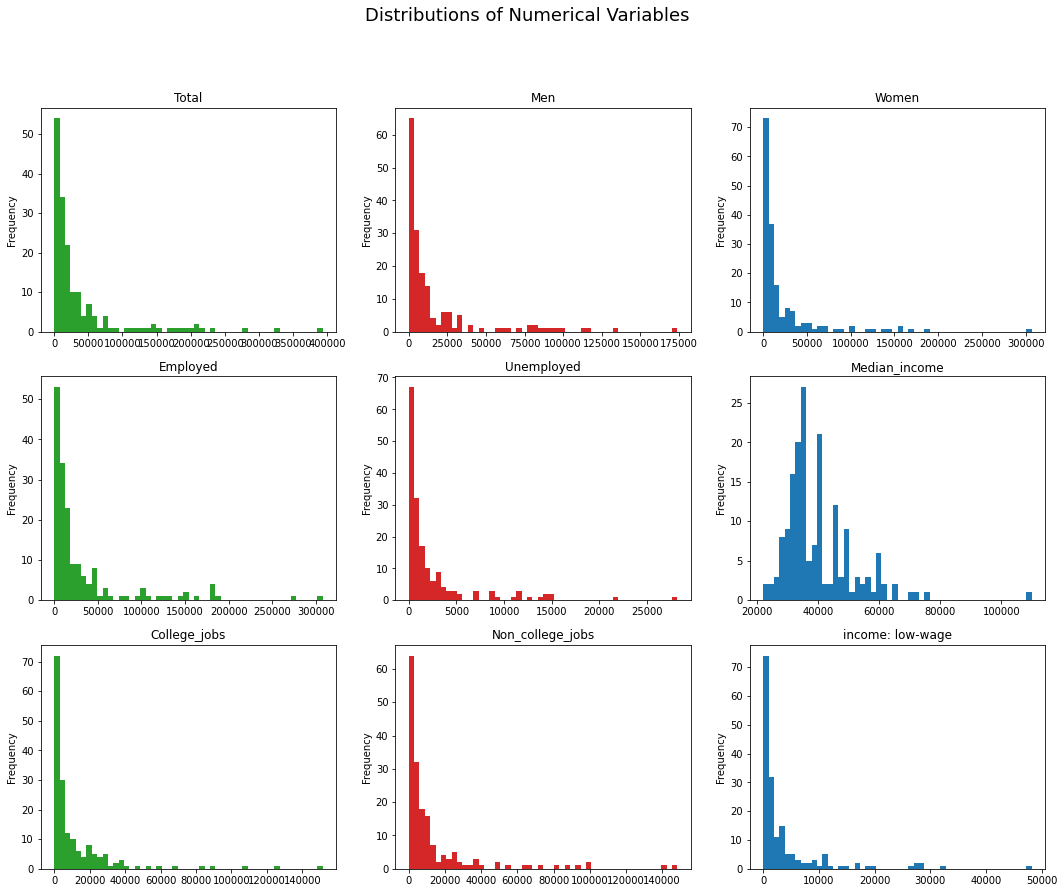

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize = (18,14))
plt.suptitle('Distributions of Numerical Variables', fontsize=18)

recent_grads['Total'].plot(ax=ax1, kind='hist', bins=50, color='tab:green').set_title('Total')
recent_grads['Men'].plot(ax=ax2, kind='hist', bins=50, color='tab:red').set_title('Men')
recent_grads['Women'].plot(ax=ax3, kind='hist', bins=50,color='tab:blue').set_title('Women')
recent_grads['Employed'].plot(ax=ax4, kind='hist', bins=50,color='tab:green').set_title('Employed')
recent_grads['Unemployed'].plot(ax=ax5, kind='hist', bins=50,color='tab:red').set_title('Unemployed')
recent_grads['Median_income'].plot(ax=ax6, kind='hist', bins=50,color ='tab:blue').set_title('Median_income')
recent_grads['College_jobs'].plot(ax=ax7, kind='hist', bins=50,color ='tab:green').set_title('College_jobs')
recent_grads['Non_college_jobs'].plot(ax=ax8, kind='hist', bins=50,color ='tab:red').set_title('Non_college_jobs')
recent_grads['income: low-wage'].plot(ax=ax9, kind='hist', bins=50,color ='tab:blue').set_title('income: low-wage')


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'Total'),
  Text(2, 0, 'Men'),
  Text(3, 0, 'Women'),
  Text(4, 0, 'Employed'),
  Text(5, 0, 'Employed Full-time'),
  Text(6, 0, 'Unemployed'),
  Text(7, 0, 'Median_income'),
  Text(8, 0, 'College_jobs'),
  Text(9, 0, 'Non_college_jobs'),
  Text(10, 0, 'income: low-wage'),
  Text(11, 0, 'Employed Part-time'),
  Text(12, 0, 'income: other')])

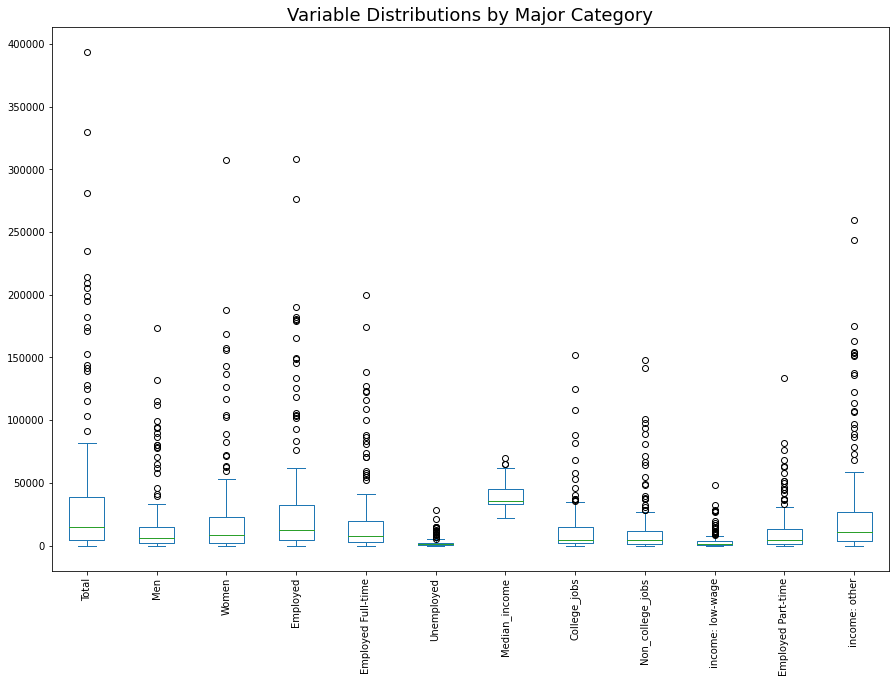

In [42]:
recent_grads[3:].plot(x='Major_category',kind='box', figsize=(15,10))
plt.title('Variable Distributions by Major Category', fontsize=18)
plt.xticks(rotation=90)

# "Napkin" design

### Dashboard level 1

Level 1 shows data by **major category**. For each category, the **average income** and the **% of employed** students are displayed in two parallel bar charts.

A tooltip is available to view the exact data.

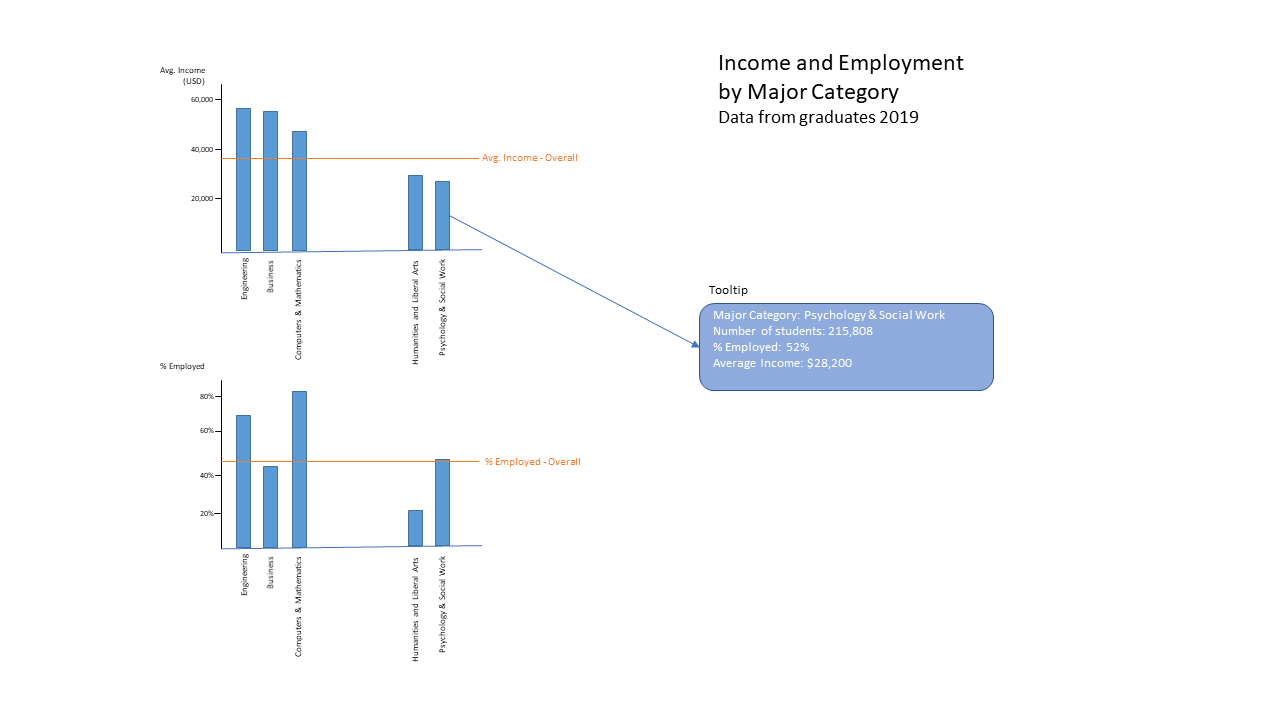

In [9]:
display.Image("./images/napkin_design_level1.png")

### Dashboard level 2

By clicking on the bar of a major category, we drill down into level 2.

Level 2 shows data by **major**, filtered by the selected major category.

For each major, the **average income** and the **% of employed** students are displayed in two parallel bar charts. The % of employment is divided between jobs that **require a degree** and those that don't. We can see as context the average values for the category and overall.

A tooltip is available to view the exact data.

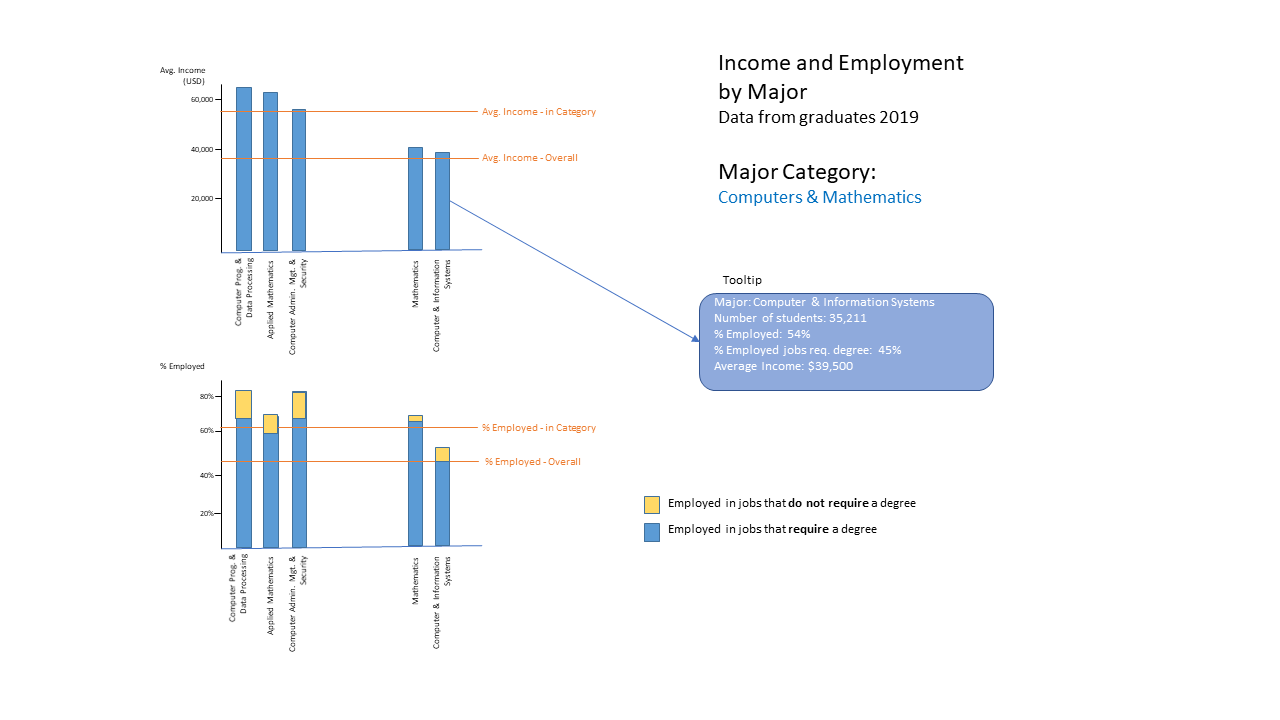

In [10]:
display.Image("./images/napkin_design_level2.png")

# Task 4: First Implementations in Altair

**Note on the calculation of the median income:** We have the median income for each major, and need to aggregate it into major categories. Strictly speaking, it is not possible to infer the real median income by category from this data. We will approximate it using the mean of the different median incomes weighted by the number of students in each major.

**Issue:** college + non_college jobs do not add up to "employed". We wondered if the "low wage jobs" would be a separate category that had to be added to calculate the % of college jobs. This is not the case.
Finally, to calculate % of college jobs, we just do `college_jobs/(college_jobs+non_college_jobs)`

In [7]:
recent_grads['Percent_employed'] = recent_grads['Employed'] / (recent_grads['Employed'] + recent_grads['Unemployed'])
recent_grads['Percent_college_jobs'] = recent_grads['College_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
recent_grads['Percent_non_college_jobs'] = recent_grads['Non_college_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
# recent_grads['Percent_low_wage_jobs'] = recent_grads['Low_wage_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'] + recent_grads['Low_wage_jobs'])
recent_grads['Total_income'] = recent_grads['Median_income'] * recent_grads['Employed Full-time']
recent_grads.head()

,Major_category,Major_long,Major,Major_code,Total,Men,Women,Employed,Employed Full-time,Unemployed,Median_income,College_jobs,Non_college_jobs,income: low-wage,Employed Part-time,income: other,Percent_employed,Percent_college_jobs,Percent_non_college_jobs,Total_income
0,Engineering,Petroleum Engineering,Petroleum Eng.,2419,2339,2057,282,1976,1207,37,110000,1534,364,193,769,1783,0.981619,0.808219,0.191781,132770000
1,Engineering,Mining And Mineral Engineering,Mining & Mineral Eng.,2416,756,679,77,640,388,85,75000,350,257,50,252,590,0.882759,0.576606,0.423394,29100000
2,Engineering,Metallurgical Engineering,Metallurgical Eng.,2415,856,725,131,648,340,16,73000,456,176,0,308,648,0.975904,0.721519,0.278481,24820000
3,Engineering,Naval Architecture And Marine Engineering,Naval Architecture & Marine Eng.,2417,1258,1123,135,758,692,40,70000,529,102,0,66,758,0.949875,0.838352,0.161648,48440000
4,Engineering,Chemical Engineering,Chemical Eng.,2405,32260,21239,11021,25694,16697,1672,65000,18314,4440,972,8997,24722,0.938902,0.804869,0.195131,1085305000


In [18]:
# sum_cols = ['Total', 'Men', 'Women', 'Employed', 'Unemployed', 'College_jobs', 'Non_college_jobs', 'Low_wage_jobs']

df_cat = recent_grads.groupby('Major_category').agg({'Median_income': 'sum', 'Total': 'sum', 'Men': 'sum', 'Women': 'sum',
                    'Employed': 'sum', 'Unemployed': 'sum', 'Employed Full-time': 'sum', 'College_jobs': 'sum',
                    'Non_college_jobs': 'sum', 'income: low-wage': 'sum'})
df_cat.reset_index(level=0, inplace=True)

# See note above about the approximation of median income by category
df_cat['Median_income'] = round(df_cat['Median_income'] / df_cat['Employed Full-time'])
df_cat['Percent_employed'] = (df_cat['Employed'] / (df_cat['Employed'] + df_cat['Unemployed']))*100
df_cat['Percent_unemployed'] = (df_cat['Unemployed'] / (df_cat['Employed'] + df_cat['Unemployed']))*100
df_cat['Percent_men'] = (df_cat['Men'] / (df_cat['Men'] + df_cat['Women']))*100
df_cat['Percent_women'] = (df_cat['Women'] / (df_cat['Men'] + df_cat['Women']))*100
df_cat['Percent_college_jobs'] = (df_cat['College_jobs'] / (df_cat['College_jobs'] + df_cat['Non_college_jobs']))*100
df_cat['Percent_non_college_jobs'] = (df_cat['Non_college_jobs'] / (df_cat['College_jobs'] + df_cat['Non_college_jobs']))*100
df_cat['Percent_low_wage_jobs'] = df_cat['income: low-wage'] / (df_cat['College_jobs'] + df_cat['Non_college_jobs'] + df_cat['income: low-wage'])
df_cat.head()

,Major_category,Median_income,Total,Men,Women,Employed,Unemployed,Employed Full-time,College_jobs,Non_college_jobs,income: low-wage,Percent_employed,Percent_unemployed,Percent_men,Percent_women,Percent_college_jobs,Percent_non_college_jobs,Percent_low_wage_jobs
0,Agriculture & Natural Resources,8.0,75620,40357,35263,63794,3486,41891,18677,33217,7414,94.818668,5.181332,53.368157,46.631843,35.990673,64.009327,0.125008
1,Arts,2.0,357130,134390,222740,288114,28228,153111,94785,163720,60116,91.076746,8.923254,37.630555,62.369445,36.666602,63.333398,0.188676
2,Biology & Life Science,3.0,453862,184919,268943,302797,22854,165802,151233,127182,42742,92.982057,7.017943,40.743442,59.256558,54.319272,45.680728,0.133088
3,Business,1.0,1302376,667852,634524,1088742,79877,790425,148538,496570,126788,93.164838,6.835162,51.279508,48.720492,23.025292,76.974708,0.164255
4,Communications & Journalism,1.0,392601,131921,260680,330660,26852,214228,86556,172992,49595,92.489203,7.510797,33.601799,66.398201,33.348745,66.651255,0.160427


In [11]:
# Required for stacked bar chart: Data set with separate rows for "Percent_employed" and "Percent_unemployed"
df_cat_E = pd.melt(df_cat, id_vars=['Major_category', 'Median_income'], value_vars=['Percent_employed', 'Percent_unemployed'], 
        var_name='Status', value_name='Percentage')
df_cat_E.head()

,Major_category,Median_income,Status,Percentage
0,Agriculture & Natural Resources,8.0,Percent_employed,94.818668
1,Arts,2.0,Percent_employed,91.076746
2,Biology & Life Science,3.0,Percent_employed,92.982057
3,Business,1.0,Percent_employed,93.164838
4,Communications & Journalism,1.0,Percent_employed,92.489203


In [12]:
# Major categories sorted by median income - used to keep the same sorting as the other chart
sorted_categories = df_cat.sort_values(by=['Median_income'], ascending=False)['Major_category'].tolist()

### Level 1 Visualizations

In [15]:
bars = alt.Chart(recent_grads).mark_bar(color='#203082', size=25).encode(
    x = alt.X('Major_category:N', title=None, sort= '-y'),
    y = alt.Y('mean(Median_income):Q', title='Mean Income'),
    tooltip = [alt.Tooltip('Major_category', title='Major Category'),
               alt.Tooltip('mean(Median_income):Q', title='Mean Income'),
               alt.Tooltip('max(Median_income):Q', title='Max. Income'),
               alt.Tooltip('min(Median_income):Q', title='Min. Income'),
               alt.Tooltip('sum(Median_income):Q', title='Total Students'),
])


rule = alt.Chart(recent_grads).mark_rule(color='red').encode(
    y = alt.Y('mean(Median_income):Q'),
    size = alt.value(3)
)

# annotation = alt.Chart({'values':[{'x':200, 'y':90}]}).mark_text(
#    text='Global Average'
# )

# (bars + rule + annotation).properties(
(bars + rule).properties(
    width=600,
    height=400,
    title='Mean Income by Major Category'
).configure_axis(
    labelFontSize=14,
    titleFontSize=14
).configure_title(
    fontSize=20,
)


alt.LayerChart(...)

In [23]:
value_vars_C = ['Percent_college_jobs', 'Percent_non_college_jobs', 'Percent_low_wage_jobs']

df_cat_C = pd.melt(df_cat, id_vars=['Major_category'], value_vars=value_vars_C,
        var_name='Status', value_name='Percentage')

In [24]:
bars = alt.Chart(df_cat_C).mark_bar().encode(
    y= alt.Y('Major_category:N', title=None),
    x='Percentage:Q',
    color='Status:N',
    order=alt.Order('Status', sort='ascending')
)

bars.properties(
    width=600,
    height=400,
    title='Type of Employment'
).configure_axis(
    labelFontSize=14,
    titleFontSize=14
).configure_title(
    fontSize=20,
)


alt.Chart(...)

## Level 2 Visualizations

In [26]:
bars = alt.Chart(recent_grads).mark_bar(color='#203082', size=15).encode(
    x = alt.X('Major:N', title=None, sort= '-y'),
    y = alt.Y('mean(Median_income):Q', title='Mean Income'),
    tooltip = [alt.Tooltip('Major', title='Major'),
               alt.Tooltip('Percent_employed', title='Percent Employed'),
               alt.Tooltip('Percent_college_jobs', title='Percent College Jobs'),
]).transform_filter(
    (alt.datum.Major_category == 'Engineering')
)

rule = alt.Chart(recent_grads).mark_rule(color='red').encode(
    y = alt.Y('mean(Median_income):Q'),
    size = alt.value(3)
).transform_filter(
    (alt.datum.Major_category == 'Engineering')
)

(bars + rule).properties(
    width=800,
    height=400,
    title='Mean Income for Engineering Majors'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20,
)


alt.LayerChart(...)

In [32]:
recent_grads['Percent_low_wage_jobs'] = recent_grads['income: low-wage'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'] + recent_grads['income: low-wage'])
RGC = pd.melt(recent_grads, id_vars=['Major', 'Major_category'], value_vars=value_vars_C,
        var_name='Status', value_name='Percentage')

alt.Chart(RGC).mark_bar().encode(
    y= alt.Y('Major:N', title=None, sort='-x'),
    x='Percentage:Q',
    color='Status:N',
    order=alt.Order('Status', sort='ascending')
).properties(
    width=600,
    height=400,
    title='Type of Employment: Engineering Majors'
).configure_axis(
    labelFontSize=12,
    titleFontSize=12
).configure_title(
    fontSize=20,
).transform_filter(
    (alt.datum.Major_category == 'Engineering')
)


alt.Chart(...)

## Finalized Visualizations

## Level 1

In [ ]:

def cat_plots():
    bars = alt.Chart(df_cat).mark_bar(color='#87CEFA', size=20, opacity=0.8).encode(
        y = alt.Y('Major_category:N', title=None, sort= '-x', axis=alt.Axis(labels=False, tickSize=0)),
        x = alt.X('Median_income:Q', title=None),
#        color = alt.condition(selection, 'Major_category:N', alt.value('grey')),
        tooltip = [alt.Tooltip('Major_category', title='Major Category'),
                   alt.Tooltip('Median_income', title='Median Income'),
                   alt.Tooltip('Total', title='Total Students'),
    ]).add_selection(alt.selection_single())

    color = 'crimson'
        
    rule = alt.Chart(recent_grads).mark_rule(color=color).encode(
        x = alt.X('mean(Median_income):Q'),
        size = alt.value(3),
#        tooltip = [alt.Tooltip('mean(Global Average')]
    )
    
    fontSize = 16
    dy = -80
    angle = 90
    fontWeight='bold'
    
    text1 = alt.Chart(recent_grads).mark_text(dx=300, dy=dy, color=color, fontSize=fontSize, text='Global Average: $', angle=angle, fontWeight=fontWeight).encode(
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    )
    
    text2 = alt.Chart(recent_grads).mark_text(dx=390, dy=dy, color=color, fontSize=fontSize, angle=angle, fontWeight=fontWeight).encode(
        text = alt.Text('mean(Median_income):Q', format='.0f'),
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    )

    incomes = (bars + rule + text1 + text2).properties(
        width=400,
        height=550,
        title='Median Income (USD)'
    )    
    
    selector = alt.selection_single(encodings=['color'])
    domain=['Percent_employed', 'Percent_unemployed']
    range=['royalblue', 'lightgrey']

    # Bar chart showing percent employed by category
    employments = alt.Chart(df_cat_E).mark_bar(size=20, opacity=0.95).encode(
        y= alt.Y('Major_category:N', title=None, sort=sorted_categories, axis=alt.Axis(tickSize=0)),
        x= alt.X('Percentage:Q', title=None, scale=alt.Scale(domain=[0, 100])),
        color= alt.condition(selector, 'Status:N', alt.value('white'), scale = alt.Scale(domain=domain, range=range)),
        order=alt.Order('Status', sort='ascending')
    ).properties(
        width=400,
        height=550,
        title='Employment Status (%)'
    ).add_selection(
    selector
    )
    

    return alt.hconcat(employments, incomes).properties(spacing=5).configure_title(fontSize=18).configure_axis(
        grid=False,
        labelFontSize=14,
        titleFontSize=14
    )
    
#     main = alt.hconcat(employments, incomes).properties(spacing=5)
#     pies = alt.hconcat(pie_g, pie_w)

#     return alt.vconcat(main, pies)


dashboard = cat_plots()
dashboard

In [ ]:
import json
from pathlib import Path

Path('dashboard-spec.json').write_text(json.dumps(dashboard.to_dict()))

### Level 2 Visualizations

In [17]:
recent_grads['unemployed'] = recent_grads['Unemployed'] / (recent_grads['Employed'] + recent_grads['Unemployed'])
recent_grads['employed'] = recent_grads['Employed'] / (recent_grads['Employed'] + recent_grads['Unemployed'])

# Split employed between college and non-college
recent_grads['employed (in-major)'] = recent_grads['employed']*recent_grads['College_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
recent_grads['employed (outside-major)'] = recent_grads['employed']*recent_grads['Non_college_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])
recent_grads.head()

# Required for stacked bar chart: Data set with separate rows for 'Percent_unemployed', 'Percent_employed_college_jobs' and
# 'Percent_employed_non_college_jobs'

df_RGE = pd.melt(recent_grads, id_vars=['Major', 'Major_category'], 
              value_vars=['unemployed', 'employed (in-major)', 'employed (outside-major)'],
        var_name='Status', value_name='Percentage')
df_RGE.head()

# Majors sorted by median income - used to keep the same sorting as the other chart
sorted_majors = recent_grads.sort_values(by=['Median_income','Major'], ascending=[False, True])['Major'].tolist()

In [18]:
recent_grads[recent_grads.Major_category=='Engineering'].Major.count()

29

In [19]:
def major_plots(major_category):
    """plots income/employment charts for selected major"""
    
    num_majors = recent_grads[recent_grads.Major_category == major_category].Major.count()
    width = 500
    height = num_majors*25
    
    # plot income by major

    bars = alt.Chart(recent_grads).mark_bar(color='#87CEFA', size=15, opacity=0.8).encode(
        y = alt.Y('Major:N', title=None, sort= sorted_majors, axis=alt.Axis(labels=False, tickSize=0)),
        x = alt.X('Median_income:Q', title=None, scale=alt.Scale(domain=[0, 110000])),
        tooltip = [alt.Tooltip('Major', title='Major'),
                   alt.Tooltip('employed:Q', title='Percent Employed'),
                   alt.Tooltip('employed (in-major):Q', title='Percent College Jobs'),
    ]).transform_filter(
        (alt.datum.Major_category == major_category)
    ).add_selection(alt.selection_single())
    
    # average lines and labels
    
    color1 = 'crimson'
    color2 = 'dimgray'

    rule_cat = alt.Chart(recent_grads).mark_rule(color=color2).encode(
        x = alt.X('mean(Median_income):Q'),
        size = alt.value(3)
    ).transform_filter(
        (alt.datum.Major_category == major_category)
    )

    rule_global = alt.Chart(recent_grads).mark_rule(color=color1).encode(
        x = alt.X('mean(Median_income):Q'),
        size = alt.value(3)
    )
    
    fontSize = 14
    fontWeight = 'normal'
    
    annotation_locs = {'Agriculture & Natural Resources': (100, 165, 170, 60, 80, 80, 90),
                   'Arts': (75, 140, 160, 60, 90, 90, 90),
                   'Biology & Life Science': (150, 215, 235, 60, 80, 80, 90),
                   'Business': (120, 185, 190, 270, 250, 275, 0),
                   'Communications & Journalism': (120, 185, 190, 70, 50, 60, 0),
                   'Computers & Mathematics': (120, 185, 190, 230, 210, 225, 0),
                   'Education': (250, 315, 335, 60, 95, 95, 90),
                   'Engineering': (400, 465, 525, 60, -20, -20, 90),
                   'Health': (120, 185, 190, 250, 230, 240, 0),
                   'Humanities & Liberal Arts': (200, 265, 285, 60, 95, 95, 90),
                   'Industrial Arts & Consumer Services': (120, 185, 190, 140, 120, 123, 0),
                   'Interdisciplinary': (120, 185, 190, 90, 70, 73, 0),
                   'Law & Public Policy': (120, 185, 190, 100, 80, 85, 0),
                   'Physical Sciences': (120, 185, 190, 200, 180, 190, 0),
                   'Psychology & Social Work': (100, 165, 165, 60, 105, 105, 90),
                   'Social Science': (120, 185, 190, 190, 170, 179, 0)
                  }
    
    dx_text, dx_val1, dx_val2, dy1, dy2, dy3, angle = annotation_locs[major_category]
    

    text1 = alt.Chart(recent_grads).mark_text(dx=dx_text, dy=dy1, color=color1, fontSize=fontSize, fontWeight=fontWeight, text='Global Avg: $', angle=angle).encode(
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    )
    
    text2 = alt.Chart(recent_grads).mark_text(dx=dx_val1, dy=dy1, color=color1, fontSize=fontSize, fontWeight=fontWeight, angle=angle).encode(
        text = alt.Text('mean(Median_income):Q', format='.0f'),
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    )
    
    text3 = alt.Chart(recent_grads).mark_text(dx=dx_text, dy=dy2, color=color2, fontSize=fontSize, fontWeight=fontWeight, text='Category Avg: $', angle=angle).encode(
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    )
    
    text4 = alt.Chart(recent_grads).mark_text(dx=dx_val2, dy=dy3, color=color2, fontSize=fontSize, fontWeight=fontWeight, angle=angle).encode(
        text = alt.Text('mean(Median_income):Q', format='.0f'),
        y= alt.Y('mean(Median_income)', axis=alt.Axis(labels=False, tickSize=0), title=None)
    ).transform_filter(
        (alt.datum.Major_category == major_category)
    )
    
    income = (bars + rule_cat + rule_global + text1 + text2 + text3 + text4).properties(
        width=width,
        height=height,
        title='Median Income (USD)')
    
    # plot employment status by major 
    selector = alt.selection_single(encodings=['color'])
    domain=['employed (in-major)', 'employed (outside-major)','unemployed']
    range=['royalblue', 'darkgrey', 'lightgrey']
    
    employment = alt.Chart(df_RGE).mark_bar(size=15).encode(
        y = alt.Y('Major:N', title=None, sort=sorted_majors, axis=alt.Axis(labelPadding=15, tickSize=0, labelFontSize=11)),
        x = alt.X('Percentage:Q', scale=alt.Scale(domain=[0, 1.0]), title=None),
        color = alt.condition(selector, 'Status:N', alt.value('white'), 
                          scale = alt.Scale(domain=domain, range=range)),
#             color = alt.Color('Status:N',  
#                            scale = alt.Scale(domain=domain, range=range)),
        order = alt.Order('Status', sort='ascending')
    ).properties(
        width=width,
        height=height,
        title='Employment Status (%)'
    ).transform_filter(
        (alt.datum.Major_category == major_category)
    ).add_selection(
    selector
    )

    return alt.hconcat(employment, income).properties(spacing=5).configure_title(fontSize=18).configure_axis(
        grid=False,
        labelFontSize=14,
        titleFontSize=14
    )

major_plots('Psychology & Social Work')

alt.HConcatChart(...)

## Export Level 2 bar charts

In [ ]:
# See list of categories
major_cats_list = df_cat.Major_category.to_list()
for i, major_cat in enumerate(major_cats_list):
    print(i, major_cat)

In [ ]:
# Generate JSON file for every category
for i, major_cat in enumerate(major_cats_list):
    dashboard = major_plots(major_cat)
    Path('dashboard-cat' + str(i) + '-spec.json').write_text(json.dumps(dashboard.to_dict()))


## Pie Charts

In [29]:
pie_gender = pd.melt(recent_grads, id_vars=['Major_category'], value_vars=['Men', 'Women'], var_name='Gender', value_name='Count')
pie_work = pd.melt(recent_grads, id_vars=['Major_category'], value_vars=['Employed Full-time', 'Employed Part-time'], var_name='Employment Type', value_name='Count')
pie_low = pd.melt(recent_grads, id_vars=['Major_category'], value_vars=['income: low-wage', 'income: other'], var_name='Low_Other', value_name='Count')

def major_pie(major_category):
    """plots gender and employment type donut charts for specified major category"""
    
    rad = 45
    width2 = 200
    height2 = 200
    df_g = pie_gender[pie_gender.Major_category==major_category]
    df_w = pie_work[pie_work.Major_category==major_category]
    df_l = pie_low[pie_low.Major_category==major_category]
    
    df_g['Percent'] = df_g['Count'].transform(lambda x: x / x.sum())
    df_w['Percent'] = df_w['Count'].transform(lambda x: x / x.sum())
    df_l['Percent'] = df_l['Count'].transform(lambda x: x / x.sum())
    
    pie_g = alt.Chart(df_g).mark_arc(innerRadius=rad).encode(
        theta=alt.Theta('Percent:Q'), 
        color=alt.Color('Gender:N'),
        tooltip = [alt.Tooltip('Gender', title=None),
    ]).properties(
            width=width2,
            height=height2,
            title='Gender'
    )

    pie_w = alt.Chart(df_w).mark_arc(innerRadius=rad).encode(
        theta=alt.Theta('Percent:Q'), 
        color=alt.Color('Employment Type:N'),
        tooltip = [alt.Tooltip('Employment Type', title='Type'),
    ]).properties(
            width=width2,
            height=height2,
            title='Employment Type'
    )
    
    pie_l = alt.Chart(df_l).mark_arc(innerRadius=rad).encode(
        theta=alt.Theta('Percent:Q'), 
        color=alt.Color('Low_Other:N'),
        tooltip = [alt.Tooltip('Low_Other', title=' '),
    ]).properties(
            width=width2,
            height=height2,
            title='Low Wage Employment'
    )

    return  pie_w | pie_g | pie_l

In [30]:
major_pie('Engineering')

C:\Users\anali\AppData\Local\Temp/ipykernel_17320/49837289.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g['Percent'] = df_g['Count'].transform(lambda x: x / x.sum())
C:\Users\anali\AppData\Local\Temp/ipykernel_17320/49837289.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['Percent'] = df_w['Count'].transform(lambda x: x / x.sum())
C:\Users\anali\AppData\Local\Temp/ipykernel_17320/49837289.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


alt.HConcatChart(...)

In [ ]:
import json
from pathlib import Path

major_cats_list = df_cat.Major_category.to_list()
for i, major_cat in enumerate(major_cats_list):
    dashboard = major_pie(major_cat)
    Path('dashboard-pie' + str(i) + '-spec.json').write_text(json.dumps(dashboard.to_dict()))